In [1]:
# BBENE- GOGL11 - Datahandling 4 beadandó - 25 11 2020
	
# Task:
# 9., Data munging with learning: on lab_5 data 

# - mix the training and testing data
# - separate data into three subset automatically and randonly (results of repeadet run may give different subsets): train, test, blind(rows with missing data)
# - data munging: fix data extremums with data transformation (visualizsation also necessary)
# - fill all the missing data with learning
# - apply K-fold cross validation with graph visualization during learning
# - try to relearned original target and compare the new results with the original performances
# - apply different learning models for fill the data and learned the original target
# - improve the final performance with choosing the best combination of the learning models (data munging and re-learning) and parameter tunning


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
%matplotlib inline



#Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
print(train.isnull().sum())
print("\n")
print(test.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [8]:
# append
# DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)
# eddig ez tűnik a legjobbnak
appended = train.append(test,ignore_index=True,verify_integrity=True,sort=False)
appended.info()
print("appended isnullsum:\n",appended.isnull().sum())
# összekeverni az egyesített adatokat
from sklearn.utils import shuffle

appended = shuffle(appended)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB
appended isnullsum:
 Loan_ID                0
Gender                24
Married                3
Dependents      

In [9]:
print(appended.head())
print("\n")
print("appended columns:",appended.columns)
print("\n")

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
640  LP001163    Male     Yes          2      Graduate            No   
736  LP001651    Male     Yes         3+      Graduate            No   
473  LP002522  Female      No          0      Graduate           Yes   
560  LP002807    Male     Yes          2  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
640             4363             1250.0       140.0             360.0   
736             3350             1560.0       135.0             360.0   
473             2500                0.0        93.0             360.0   
560             3675              242.0       108.0             360.0   
7               3036             2504.0       158.0             360.0   

     Credit_History Property_Area Loan_Status  
640             NaN         Urban         NaN  
736             1.0         Urba

In [10]:
# A blind dataframe-be másolom a mixelt dataframe szerkezetét
blind = pd.DataFrame(columns=appended.columns)
print(blind.head())
#később feltöltöm azokkal az sorokkal a mixelt dataframe.ből amiben bárhol is van hiányó adat
print("\n")
print("blind columns:",blind.columns)
print("\n")
print("blind shape:",blind.shape)

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


blind columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


blind shape: (0, 13)


In [11]:
#ezzel a blind dataframet feltöltöm olyan elemekkel az appended dataframeből
# amiben bárhol null érték van

blind = blind.append(appended[appended.isnull().T.any().T]) #marian szerinti
# blind = appended[appended.isnull().T.any().T] #eredeti
blind.info()
print("blind shape:",blind.shape)
#501 rekord van amiben bármelyik oszlopban np.NaN található



<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 640 to 894
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            501 non-null    object 
 1   Gender             477 non-null    object 
 2   Married            498 non-null    object 
 3   Dependents         476 non-null    object 
 4   Education          501 non-null    object 
 5   Self_Employed      446 non-null    object 
 6   ApplicantIncome    501 non-null    object 
 7   CoapplicantIncome  501 non-null    float64
 8   LoanAmount         474 non-null    float64
 9   Loan_Amount_Term   481 non-null    float64
 10  Credit_History     422 non-null    float64
 11  Property_Area      501 non-null    object 
 12  Loan_Status        134 non-null    object 
dtypes: float64(4), object(9)
memory usage: 54.8+ KB
blind shape: (501, 13)


In [12]:
blind.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [13]:
# az ApplicantIncome-ra kirajzoltatok gráfokat az összes adathalmazon

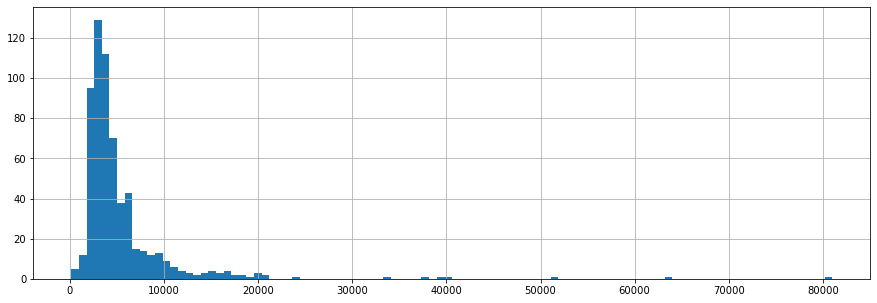

In [14]:
train['ApplicantIncome'].hist(bins=100,figsize=(15,5))

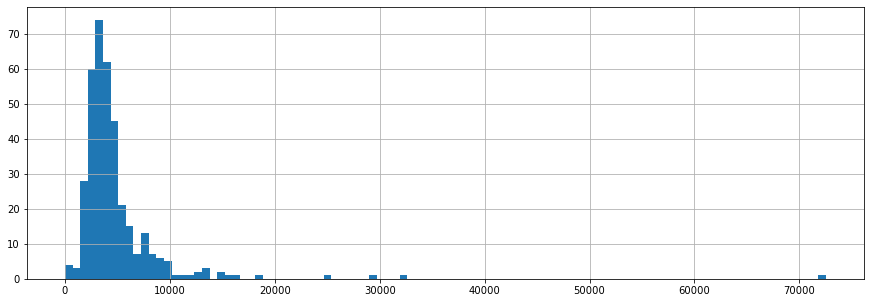

In [15]:
test['ApplicantIncome'].hist(bins=100,figsize=(15,5))

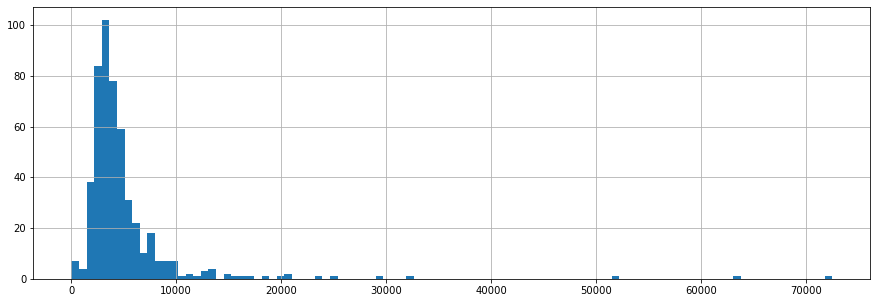

In [16]:
blind['ApplicantIncome'].hist(bins=100,figsize=(15,5))

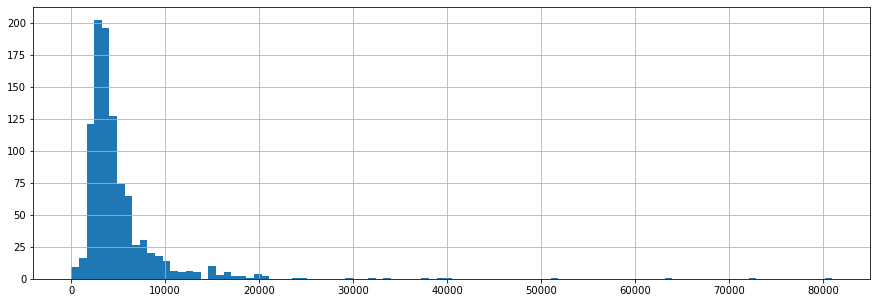

In [17]:
appended['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [18]:
#eddig adatmegoszlási arány
sumofrecords = train.shape[0] + test.shape[0]
print("Train adatok %-a:", train.shape[0] / sumofrecords)
print("Test adatok %-a:", test.shape[0] / sumofrecords)

Train adatok %-a: 0.6258919469928644
Test adatok %-a: 0.37410805300713557


In [19]:
#legyen 70-30 az egyik arány
train70 = appended.sample(frac = 0.7)
test30 = appended.sample(frac = 0.3)

sumofrecords7030 = train70.shape[0] + test30.shape[0]
print("Train70 adatok %-a:", train70.shape[0] / sumofrecords7030)
print("Test30 adatok %-a:", test30.shape[0] / sumofrecords7030)

Train70 adatok %-a: 0.7003058103975535
Test30 adatok %-a: 0.2996941896024465


In [20]:
train70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 243 to 197
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            687 non-null    object 
 1   Gender             673 non-null    object 
 2   Married            685 non-null    object 
 3   Dependents         667 non-null    object 
 4   Education          687 non-null    object 
 5   Self_Employed      652 non-null    object 
 6   ApplicantIncome    687 non-null    int64  
 7   CoapplicantIncome  687 non-null    float64
 8   LoanAmount         665 non-null    float64
 9   Loan_Amount_Term   672 non-null    float64
 10  Credit_History     637 non-null    float64
 11  Property_Area      687 non-null    object 
 12  Loan_Status        426 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 75.1+ KB


In [21]:
train70.isnull().sum()

Loan_ID                0
Gender                14
Married                2
Dependents            20
Education              0
Self_Employed         35
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      15
Credit_History        50
Property_Area          0
Loan_Status          261
dtype: int64

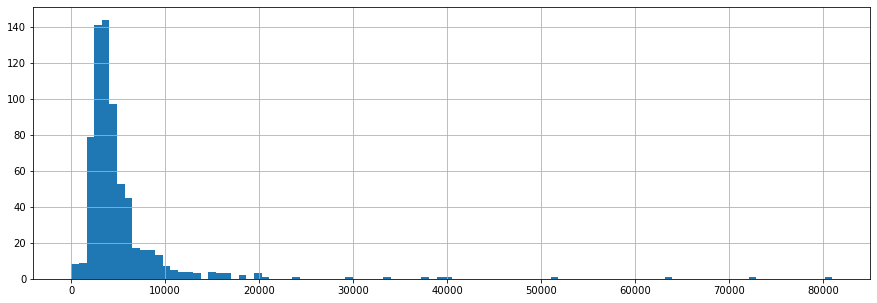

In [22]:
train70['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [23]:
test30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 237 to 615
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            294 non-null    object 
 1   Gender             286 non-null    object 
 2   Married            294 non-null    object 
 3   Dependents         292 non-null    object 
 4   Education          294 non-null    object 
 5   Self_Employed      280 non-null    object 
 6   ApplicantIncome    294 non-null    int64  
 7   CoapplicantIncome  294 non-null    float64
 8   LoanAmount         287 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     266 non-null    float64
 11  Property_Area      294 non-null    object 
 12  Loan_Status        198 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 32.2+ KB


In [24]:
test30.isnull().sum()

Loan_ID               0
Gender                8
Married               0
Dependents            2
Education             0
Self_Employed        14
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            7
Loan_Amount_Term      5
Credit_History       28
Property_Area         0
Loan_Status          96
dtype: int64

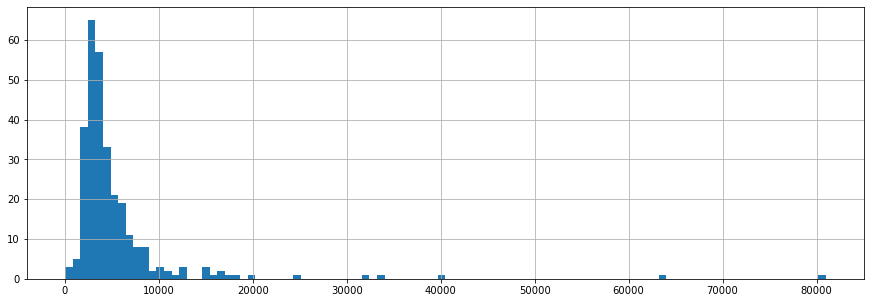

In [25]:
test30['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [26]:
#legyen 50-50-es arány is
train50 = appended.sample(frac = 0.5)
test50 = appended.sample(frac = 0.5)

sumofrecords5050 = train50.shape[0] + test50.shape[0]
print("Train50 adatok %-a:", train50.shape[0] / sumofrecords5050)
print("Test50 adatok %-a:", test50.shape[0] / sumofrecords5050)

Train50 adatok %-a: 0.5
Test50 adatok %-a: 0.5


In [27]:
train50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 526 to 137
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            490 non-null    object 
 1   Gender             477 non-null    object 
 2   Married            488 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          490 non-null    object 
 5   Self_Employed      456 non-null    object 
 6   ApplicantIncome    490 non-null    int64  
 7   CoapplicantIncome  490 non-null    float64
 8   LoanAmount         476 non-null    float64
 9   Loan_Amount_Term   481 non-null    float64
 10  Credit_History     447 non-null    float64
 11  Property_Area      490 non-null    object 
 12  Loan_Status        302 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.6+ KB


In [28]:
train50.isnull().sum()

Loan_ID                0
Gender                13
Married                2
Dependents             8
Education              0
Self_Employed         34
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            14
Loan_Amount_Term       9
Credit_History        43
Property_Area          0
Loan_Status          188
dtype: int64

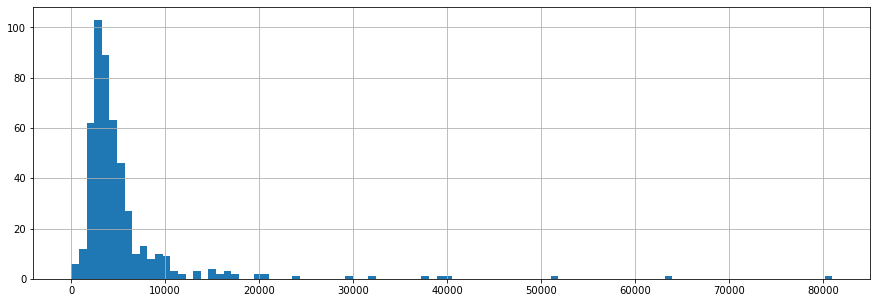

In [29]:
train50['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [30]:
test50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 552 to 326
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            490 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            488 non-null    object 
 3   Dependents         475 non-null    object 
 4   Education          490 non-null    object 
 5   Self_Employed      465 non-null    object 
 6   ApplicantIncome    490 non-null    int64  
 7   CoapplicantIncome  490 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   483 non-null    float64
 10  Credit_History     450 non-null    float64
 11  Property_Area      490 non-null    object 
 12  Loan_Status        303 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.6+ KB


In [31]:
test50.isnull().sum()

Loan_ID                0
Gender                10
Married                2
Dependents            15
Education              0
Self_Employed         25
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            15
Loan_Amount_Term       7
Credit_History        40
Property_Area          0
Loan_Status          187
dtype: int64

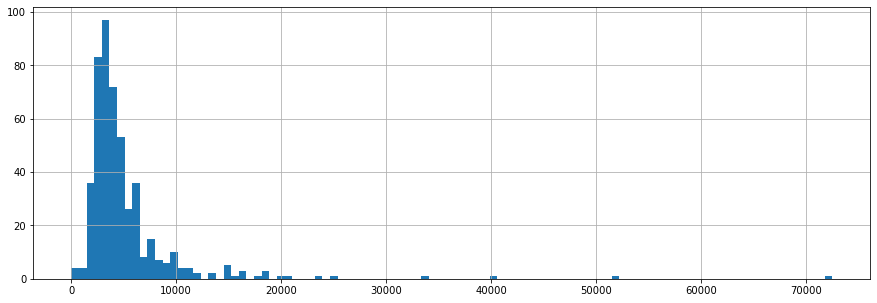

In [32]:
test50['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [33]:
# random arányú is legyen ahol train > 0.5
import random
randomrate = random.uniform(0.5,1.0)
# randomrate

trainrandom = appended.sample(frac = randomrate)
testrandom = appended.sample(frac = (1 - randomrate))
print("Trainrandom shape:", trainrandom.shape)
print("Testrandom shape:",testrandom.shape)

print("\n")

sumofrecordsrandom = trainrandom.shape[0] + testrandom.shape[0]
print("Trainrandom adatok %-a:", trainrandom.shape[0] / sumofrecordsrandom)
print("Testrandom adatok %-a:", testrandom.shape[0] / sumofrecordsrandom)

Trainrandom shape: (597, 13)
Testrandom shape: (384, 13)


Trainrandom adatok %-a: 0.6085626911314985
Testrandom adatok %-a: 0.39143730886850153


In [34]:
trainrandom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 83 to 821
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            597 non-null    object 
 1   Gender             580 non-null    object 
 2   Married            595 non-null    object 
 3   Dependents         583 non-null    object 
 4   Education          597 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    597 non-null    int64  
 7   CoapplicantIncome  597 non-null    float64
 8   LoanAmount         576 non-null    float64
 9   Loan_Amount_Term   585 non-null    float64
 10  Credit_History     542 non-null    float64
 11  Property_Area      597 non-null    object 
 12  Loan_Status        378 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.3+ KB


In [35]:
trainrandom.isnull().sum()

Loan_ID                0
Gender                17
Married                2
Dependents            14
Education              0
Self_Employed         33
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            21
Loan_Amount_Term      12
Credit_History        55
Property_Area          0
Loan_Status          219
dtype: int64

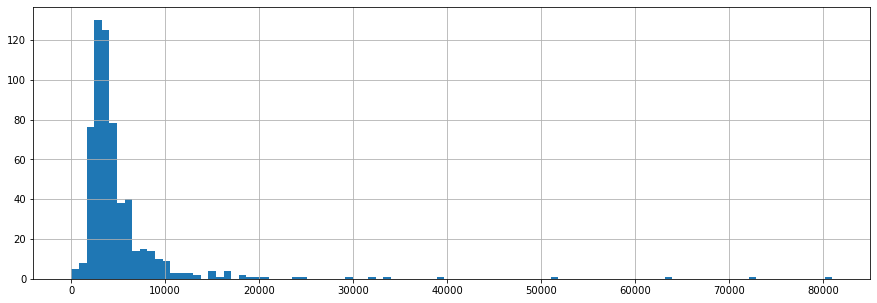

In [36]:
trainrandom['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [37]:
testrandom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 4 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             370 non-null    object 
 2   Married            382 non-null    object 
 3   Dependents         376 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      366 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         372 non-null    float64
 9   Loan_Amount_Term   375 non-null    float64
 10  Credit_History     349 non-null    float64
 11  Property_Area      384 non-null    object 
 12  Loan_Status        232 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 42.0+ KB


In [38]:
testrandom.isnull().sum()

Loan_ID                0
Gender                14
Married                2
Dependents             8
Education              0
Self_Employed         18
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            12
Loan_Amount_Term       9
Credit_History        35
Property_Area          0
Loan_Status          152
dtype: int64

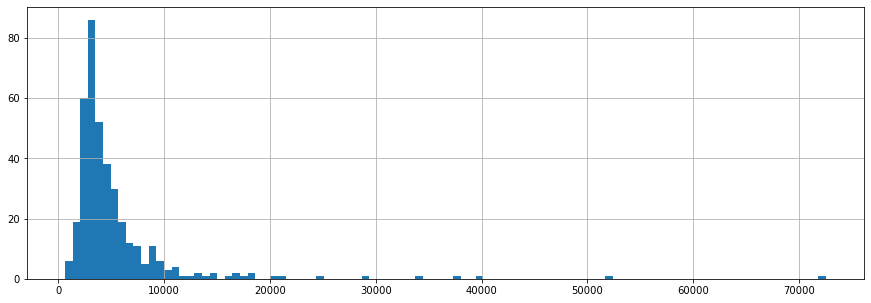

In [39]:
testrandom['ApplicantIncome'].hist(bins=100,figsize=(15,5))

In [40]:
# logaritmikus simítás az összes adathalmazon az ApplicantIncome attribútumra

In [41]:
import numpy as np
train["ApplicantIncome_log"] = np.log(train["ApplicantIncome"])
test["ApplicantIncome_log"] = np.log(test["ApplicantIncome"])

train70["ApplicantIncome_log"] = np.log(train70["ApplicantIncome"])
test30["ApplicantIncome_log"] = np.log(test30["ApplicantIncome"])

train50["ApplicantIncome_log"] = np.log(train50["ApplicantIncome"])
test50["ApplicantIncome_log"] = np.log(test50["ApplicantIncome"])

trainrandom["ApplicantIncome_log"] = np.log(trainrandom["ApplicantIncome"])
testrandom["ApplicantIncome_log"] = np.log(testrandom["ApplicantIncome"])

#mivel sok rekord ApplicantIncom_log értéke nulla és a logaritmus nem tud mit kezdeni vele
#ezért ki kell cserélni a +-végteleneket és NaN értékeket nullára
train["ApplicantIncome_log"] = train["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)
test["ApplicantIncome_log"] = test["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)

train70["ApplicantIncome_log"] = train70["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)
test30["ApplicantIncome_log"] = test30["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)

train50["ApplicantIncome_log"] = train50["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)
test50["ApplicantIncome_log"] = test50["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)

trainrandom["ApplicantIncome_log"] = trainrandom["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)
testrandom["ApplicantIncome_log"] = testrandom["ApplicantIncome_log"].replace([np.inf,-np.inf,np.NaN],0)

C:\Users\Buzadara\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
# megjelenítjük a logaritmikusan simított ApplicantIncome attribútumot az összes adathalmazban

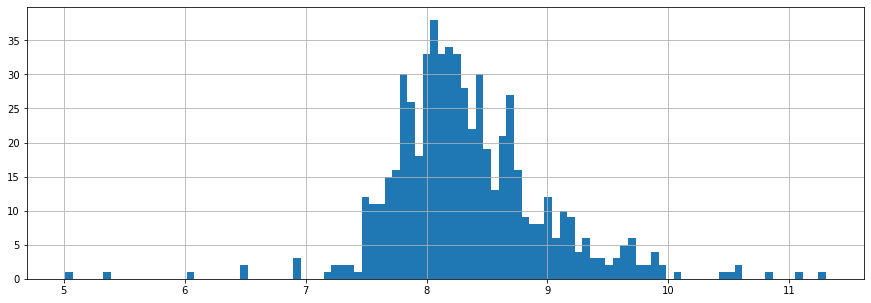

In [43]:
train['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

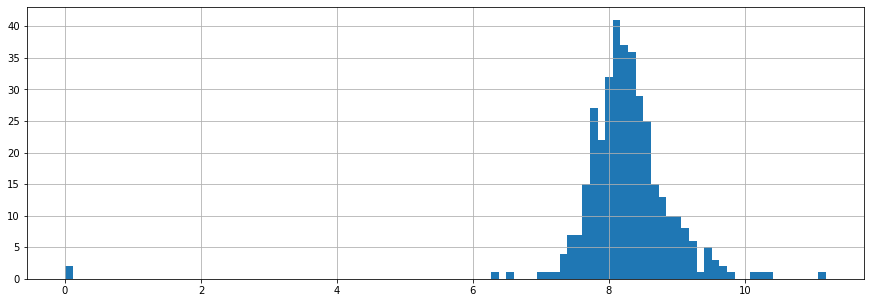

In [44]:
test['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

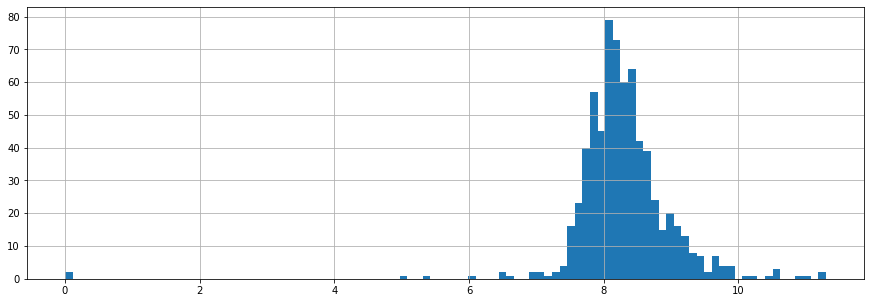

In [45]:
train70['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

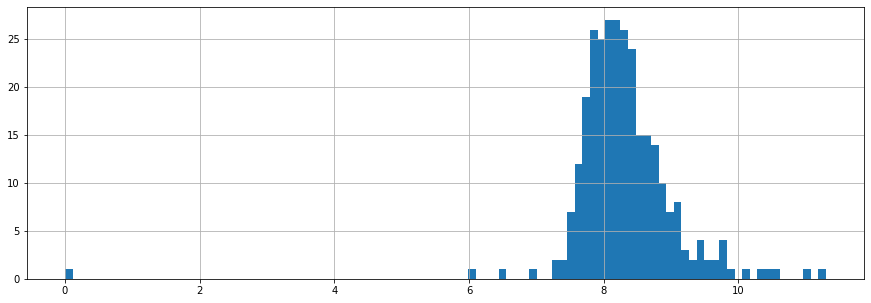

In [46]:
test30['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

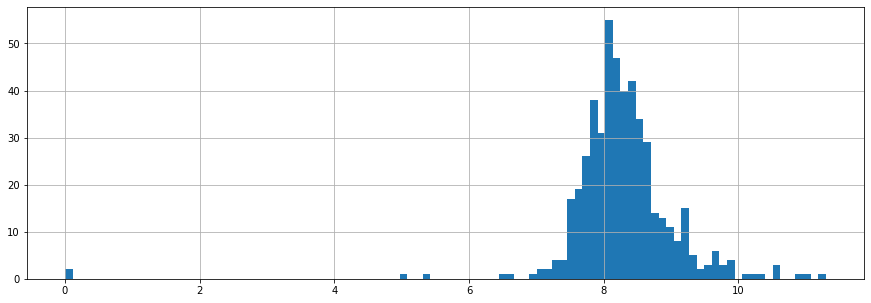

In [47]:
train50['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

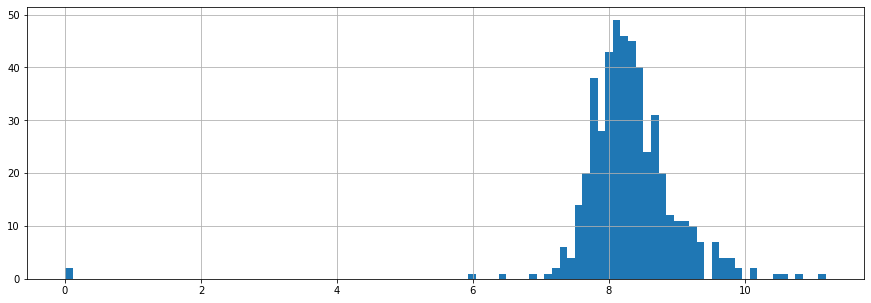

In [48]:
test50['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

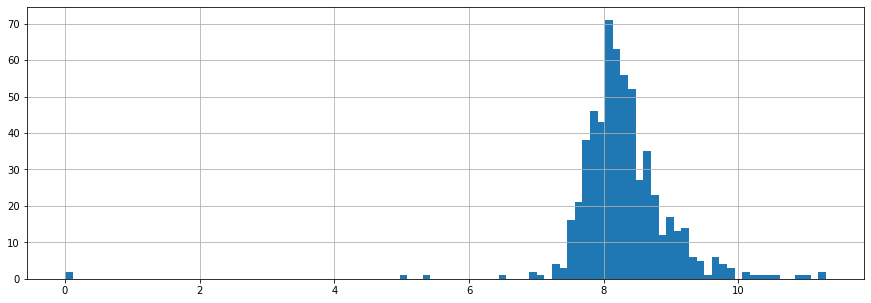

In [49]:
trainrandom['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

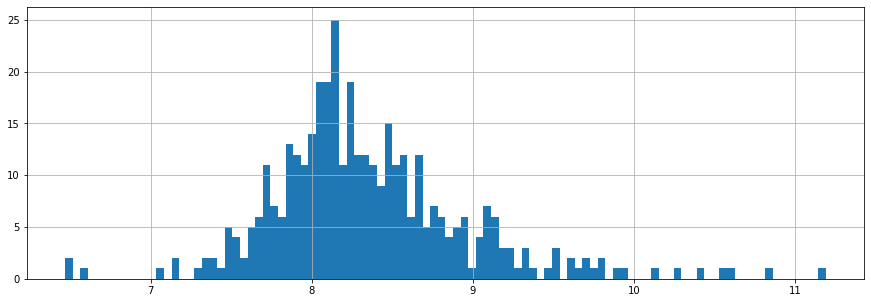

In [50]:
testrandom['ApplicantIncome_log'].hist(bins=100,figsize=(15,5))

In [51]:
# a LoanAmount-ra is megcsinálom ugyanezt a logolást

In [52]:
train["LoanAmount_log"] = np.log(train["LoanAmount"])
test["LoanAmount_log"] = np.log(test["LoanAmount"])

train70["LoanAmount_log"] = np.log(train70["LoanAmount"])
test30["LoanAmount_log"] = np.log(test30["LoanAmount"])

train50["LoanAmount_log"] = np.log(train50["LoanAmount"])
test50["LoanAmount_log"] = np.log(test50["LoanAmount"])

trainrandom["LoanAmount_log"] = np.log(trainrandom["LoanAmount"])
testrandom["LoanAmount_log"] = np.log(testrandom["LoanAmount"])

#mivel sok rekord LoanAmount_log értéke nulla és a logaritmus nem tud mit kezdeni vele
#ezért ki kell cserélni a +-végteleneket és NaN értékeket nullára
train["LoanAmount_log"] = train["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)
test["LoanAmount_log"] = test["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)

train70["LoanAmount_log"] = train70["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)
test30["LoanAmount_log"] = test30["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)

train50["LoanAmount_log"] = train50["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)
test50["LoanAmount_log"] = test50["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)

trainrandom["LoanAmount_log"] = trainrandom["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)
testrandom["LoanAmount_log"] = testrandom["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],0)

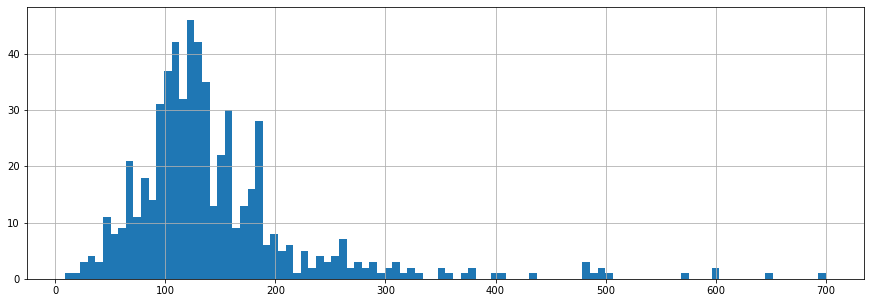

In [53]:
train['LoanAmount'].hist(bins=100,figsize=(15,5))

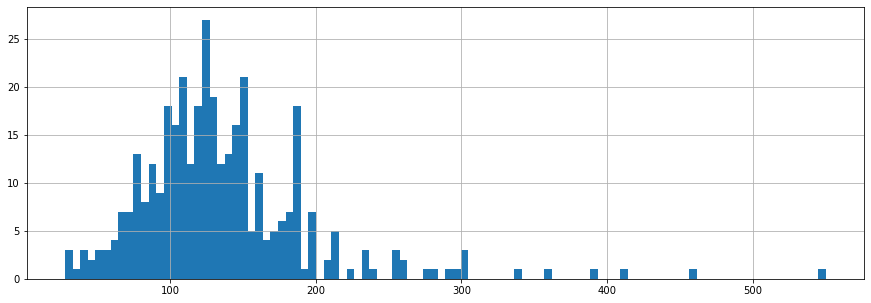

In [54]:
test['LoanAmount'].hist(bins=100,figsize=(15,5))

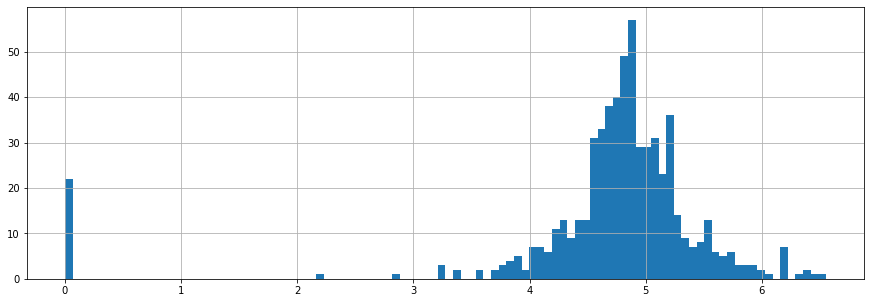

In [55]:
train['LoanAmount_log'].hist(bins=100,figsize=(15,5))

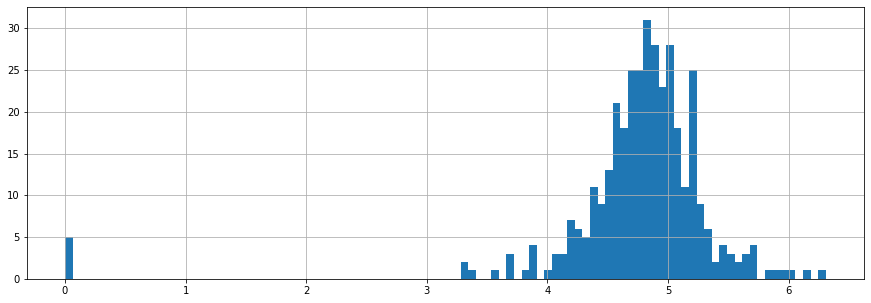

In [56]:
test['LoanAmount_log'].hist(bins=100,figsize=(15,5))

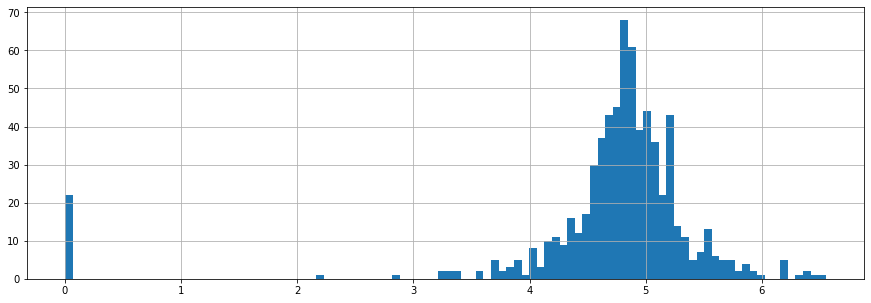

In [57]:
train70['LoanAmount_log'].hist(bins=100,figsize=(15,5))

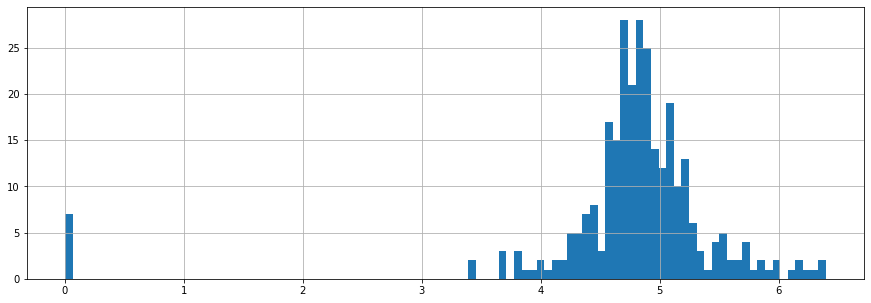

In [58]:
test30['LoanAmount_log'].hist(bins=100,figsize=(15,5))

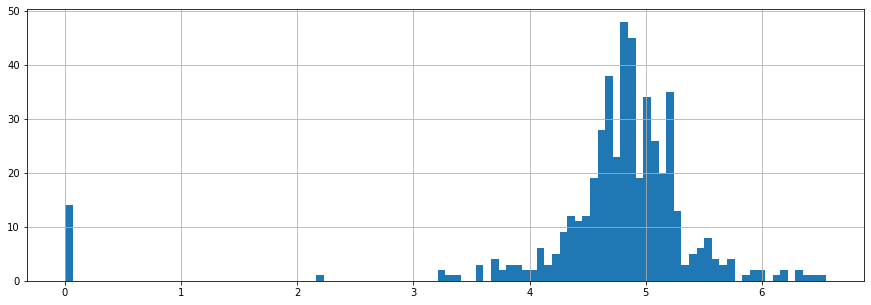

In [59]:
train50['LoanAmount_log'].hist(bins=100,figsize=(15,5))

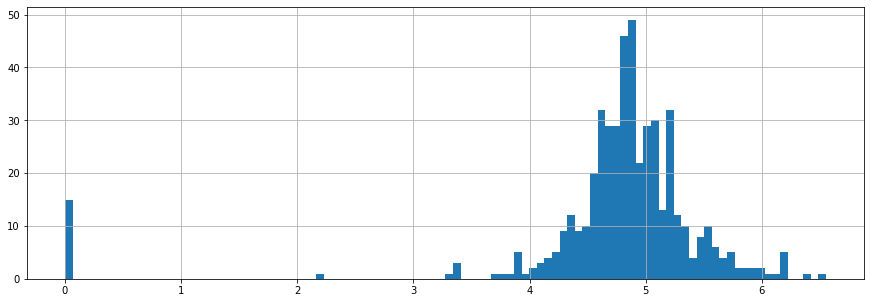

In [60]:
test50['LoanAmount_log'].hist(bins=100,figsize=(15,5))

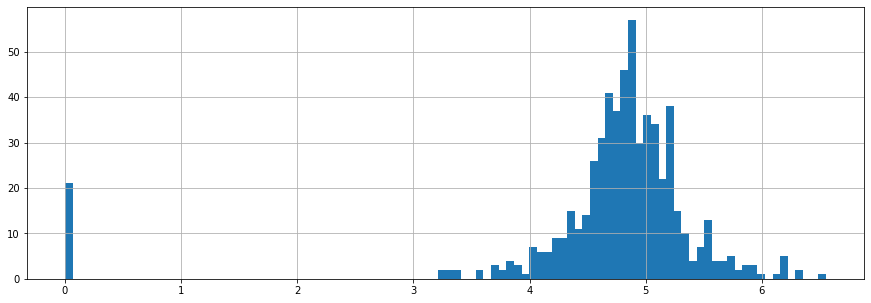

In [61]:
trainrandom['LoanAmount_log'].hist(bins=100,figsize=(15,5))

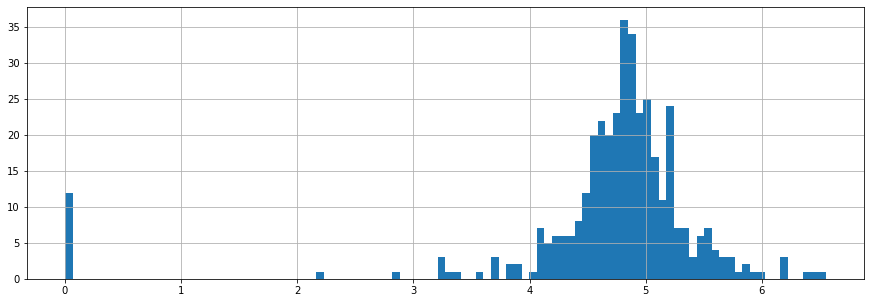

In [62]:
testrandom['LoanAmount_log'].hist(bins=100,figsize=(15,5))

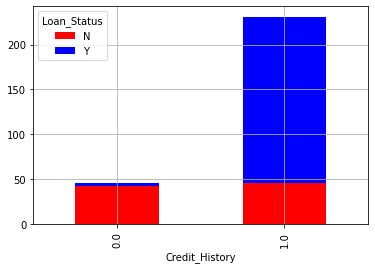

In [63]:
#Train50 Credit history + Loan Status
fsc = pd.crosstab(train50['Credit_History'], train50['Loan_Status'])
fsc.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

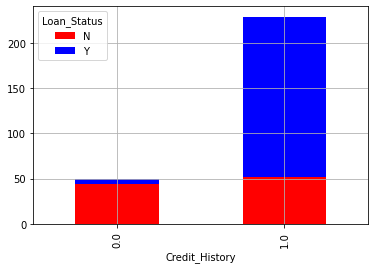

In [64]:
#Test50 Credit history + Loan Status
fsc = pd.crosstab(test50['Credit_History'], test50['Loan_Status'])
fsc.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

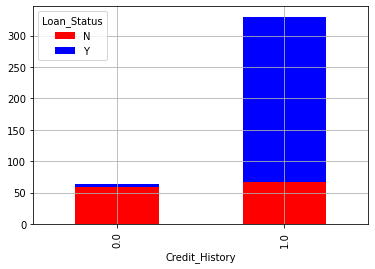

In [65]:
#Train70 Credit history + Loan Status
fsc = pd.crosstab(train70['Credit_History'], train70['Loan_Status'])
fsc.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

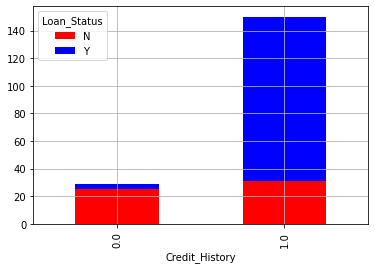

In [66]:
#Test30 Credit history + Loan Status
fsc = pd.crosstab(test30['Credit_History'], test30['Loan_Status'])
fsc.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

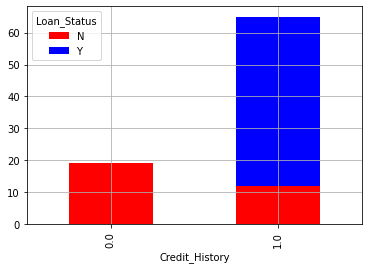

In [67]:
# blind Credit history + Loan Status
fsc = pd.crosstab(blind['Credit_History'], blind['Loan_Status'])
fsc.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

In [68]:
blind.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [69]:
#feltöltjük a blindból hiányzó elemeket

blind['LoanAmount'].fillna(blind['LoanAmount'].mean(), inplace=True)
blind['Gender'].fillna(blind['Gender'].mode()[0], inplace=True)
blind['Married'].fillna(blind['Married'].mode()[0], inplace=True)
blind['Dependents'].fillna(blind['Dependents'].mode()[0], inplace=True)
blind['Loan_Amount_Term'].fillna(blind['Loan_Amount_Term'].mode()[0], inplace=True)
blind['Credit_History'].fillna(blind['Credit_History'].mode()[0], inplace=True)
blind['Self_Employed'].fillna('No',inplace=True)

In [70]:
blind.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

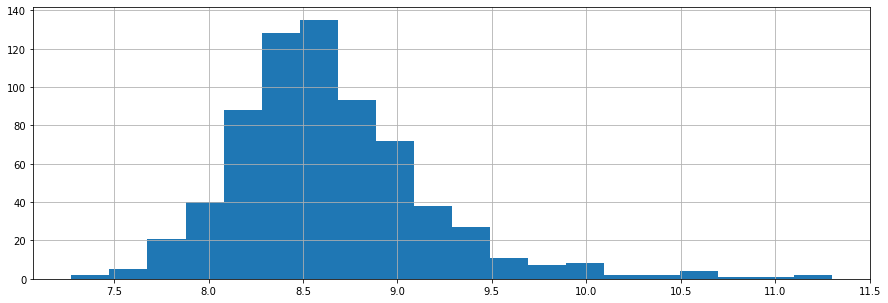

In [71]:
# train70-re létrehozok egy totalincome-ot
train70['TotalIncome'] = train70['ApplicantIncome'] + train70['CoapplicantIncome']
#illetve logaritmikus simítást
train70['TotalIncome_log'] = np.log(train70['TotalIncome'])
train70['TotalIncome_log'].hist(bins=20,figsize=(15,5))

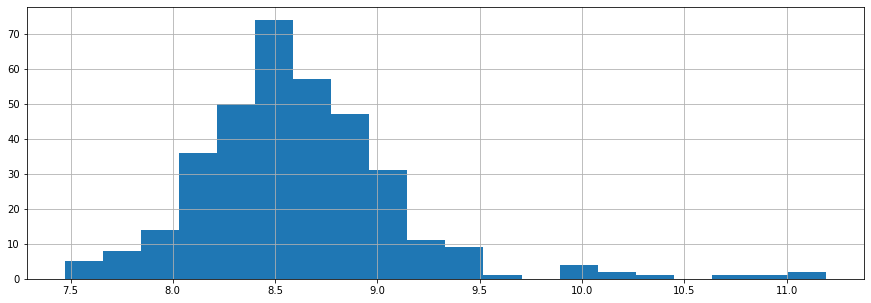

In [72]:
# blind-ra létrehozok egy totalincome-ot
blind['TotalIncome'] = train70['ApplicantIncome'] + blind['CoapplicantIncome']
#illetve logaritmikus simítást
blind['TotalIncome_log'] = np.log(blind['TotalIncome'])
blind['TotalIncome_log'].hist(bins=20,figsize=(15,5))

In [73]:
train.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [74]:
from sklearn import preprocessing
# ez működik, ezt kell replikálni
for x in train.columns:
    if train[x].dtype == 'object':
        # Encode labels with value between 0 and n_classes-1.
        lbl = preprocessing.LabelEncoder()
        
        # Fit label encoder
        lbl.fit(list(train[x].values))
        
        # Transform labels to normalized encoding.
        train[x] = lbl.transform(list(train[x].values))

In [75]:
train.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [76]:
train70.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
ApplicantIncome_log    float64
LoanAmount_log         float64
TotalIncome            float64
TotalIncome_log        float64
dtype: object

In [77]:
# train70-re labelencoder
for x in train70.columns:
    if train70[x].dtype == 'object':
        # Encode labels with value between 0 and n_classes-1.
        lbl = preprocessing.LabelEncoder()
        
        # Fit label encoder
        lbl.fit(list(train70[x].values))
        
        # Transform labels to normalized encoding.
        train70[x] = lbl.transform(list(train70[x].values))
train70.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
TotalIncome            float64
TotalIncome_log        float64
dtype: object

In [78]:
train50.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [79]:
# train50-re labelencoder
for x in train50.columns:
    if train50[x].dtype == 'object':
        # Encode labels with value between 0 and n_classes-1.
        lbl = preprocessing.LabelEncoder()
        
        # Fit label encoder
        lbl.fit(list(train50[x].values))
        
        # Transform labels to normalized encoding.
        train50[x] = lbl.transform(list(train50[x].values))
train50.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [80]:
# train & test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  
#Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #kijavítva
    
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
    
  result = ('Cross-Validation Score','Accuracy')

  x = np.arange(len(result))
  y = [np.mean(error)*100,accuracy*100,]


  plt.bar(x,y)
  plt.xticks(x, result)
  plt.xlabel('%')
  plt.title('result')
  

  plt.show()

In [81]:
train.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
dtype: int64

In [82]:
# elimináljuk a hiányzó elemeket a train-ből
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [83]:
train.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

Accuracy : 80.945%
Cross-Validation Score : 80.946%


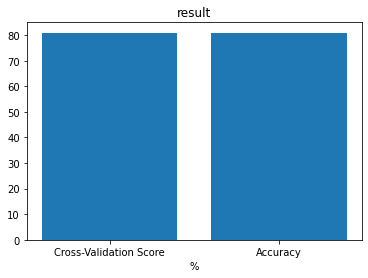

In [84]:
# logistic regression train-re
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,train, predictor_var, outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


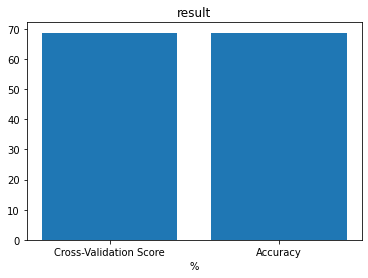

In [85]:
# logistic regression train-re - education alapján
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education']
classification_model(model,train, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


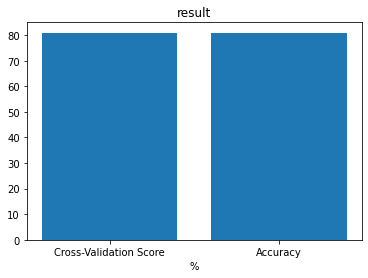

In [86]:
# logistic regression train-re - több prediktor alapján
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model,train, predictor_var, outcome_var)
# ez már egész elfogadható

In [87]:
test30.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [88]:
test30.isnull().sum()

Loan_ID                 0
Gender                  8
Married                 0
Dependents              2
Education               0
Self_Employed          14
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              7
Loan_Amount_Term        5
Credit_History         28
Property_Area           0
Loan_Status            96
ApplicantIncome_log     0
LoanAmount_log          0
dtype: int64

In [89]:
# elimináljuk a hiányzó elemeket a test30-ból
test30['Gender'].fillna(test30['Gender'].mode()[0], inplace=True)
test30['Married'].fillna(test30['Married'].mode()[0], inplace=True)
test30['Dependents'].fillna(test30['Dependents'].mode()[0], inplace=True)
test30['Self_Employed'].fillna(test30['Self_Employed'].mode()[0], inplace=True)


test30['LoanAmount'].fillna(test30['LoanAmount'].mean(), inplace=True)
test30['Loan_Amount_Term'].fillna(test30['Loan_Amount_Term'].mode()[0], inplace=True)
test30['Credit_History'].fillna(test30['Credit_History'].mode()[0], inplace=True)
test30['Loan_Status'].fillna(test30['Loan_Status'].mode()[0], inplace=True)

test30.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

In [90]:
# test30-ra labelencoder
for x in test30.columns:
    if test30[x].dtype == 'object':
        # Encode labels with value between 0 and n_classes-1.
        lbl = preprocessing.LabelEncoder()
        
        # Fit label encoder
        lbl.fit(list(test30[x].values))
        
        # Transform labels to normalized encoding.
        test30[x] = lbl.transform(list(test30[x].values))
test30.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [91]:
# train70 & test30
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  
#Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #kijavítva
    
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train70, test30 in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train70,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train70]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test30,:], data[outcome].iloc[test30]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
    
  result = ('Cross-Validation Score','Accuracy')

  x = np.arange(len(result))
  y = [np.mean(error)*100,accuracy*100,]


  plt.bar(x,y)
  plt.xticks(x, result)
  plt.xlabel('%')
  plt.title('result')
  

  plt.show()

In [92]:
train70.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
TotalIncome            float64
TotalIncome_log        float64
dtype: object

In [93]:
train70.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       15
Credit_History         50
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
TotalIncome             0
TotalIncome_log         0
dtype: int64

In [94]:
# elimináljuk a hiányzó elemeket a train70-ből
train70['LoanAmount'].fillna(train70['LoanAmount'].mean(), inplace=True)
train70['Loan_Amount_Term'].fillna(train70['Loan_Amount_Term'].mode()[0], inplace=True)
train70['Credit_History'].fillna(train70['Credit_History'].mode()[0], inplace=True)
train70.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
ApplicantIncome_log    0
LoanAmount_log         0
TotalIncome            0
TotalIncome_log        0
dtype: int64

Accuracy : 50.364%
Cross-Validation Score : 50.371%


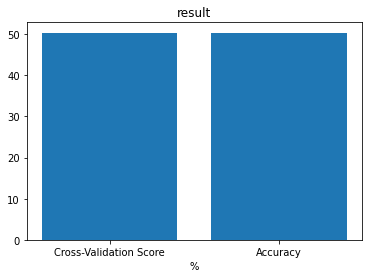

In [95]:
# logistic regression train70-re
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,train70, predictor_var, outcome_var)
# gyenge

Accuracy : 44.978%
Cross-Validation Score : 44.977%


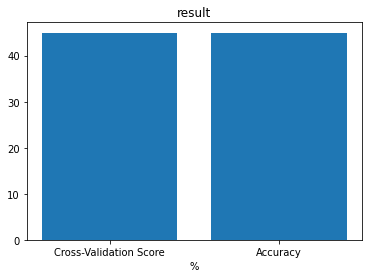

In [96]:
# logistic regression train70-re - education alapján
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education']
classification_model(model,train70, predictor_var, outcome_var)
# gyenge

Accuracy : 49.782%
Cross-Validation Score : 48.474%


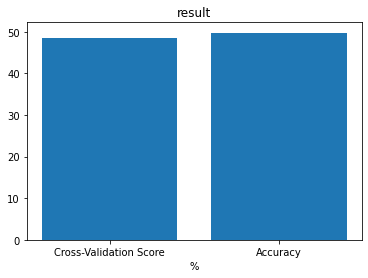

In [97]:
# logistic regression train70-re , több prediktorral
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model,train70, predictor_var, outcome_var)
# még ez is elég gyenge

Accuracy : 93.322%
Cross-Validation Score : 69.548%


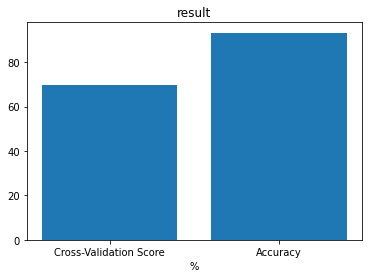

In [98]:
# DecisionTreeClassifier train-re
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model, train ,predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

Accuracy : 83.697%
Cross-Validation Score : 40.032%


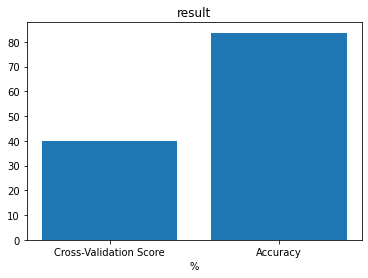

In [99]:
# DecisionTreeClassifier train70-re
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model, train70 ,predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

In [100]:
#nézzük meg train50-re is
train50.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [101]:
train50.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             14
Loan_Amount_Term        9
Credit_History         43
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
dtype: int64

In [102]:
# elimináljuk a hiányzó elemeket a train50-ből
train50['LoanAmount'].fillna(train50['LoanAmount'].mean(), inplace=True)
train50['Loan_Amount_Term'].fillna(train50['Loan_Amount_Term'].mode()[0], inplace=True)
train50['Credit_History'].fillna(train50['Credit_History'].mode()[0], inplace=True)
train50.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

Accuracy : 49.592%
Cross-Validation Score : 47.959%


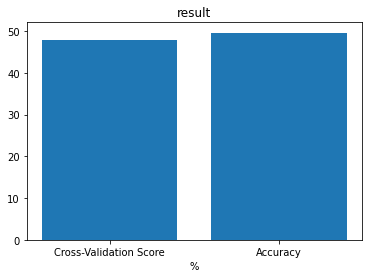

In [103]:
# logistic regression train50-re
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,train50, predictor_var, outcome_var)
# gyenge

Accuracy : 42.449%
Cross-Validation Score : 36.939%


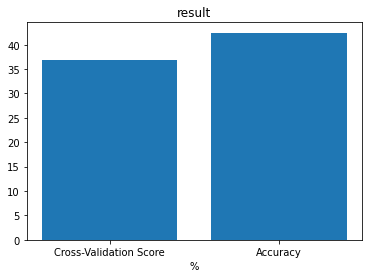

In [104]:
# logistic regression train50-re Education alapján
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education']
classification_model(model,train50, predictor_var, outcome_var)
# gyenge

Accuracy : 48.163%
Cross-Validation Score : 45.306%


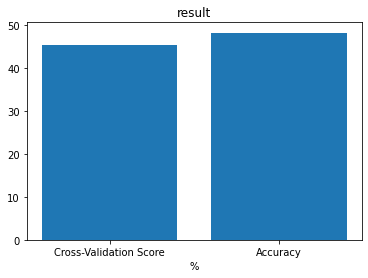

In [105]:
# logistic regression train50-re , több prediktorral
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model,train50, predictor_var, outcome_var)
# még ez is elég gyenge

Accuracy : 86.122%
Cross-Validation Score : 40.612%


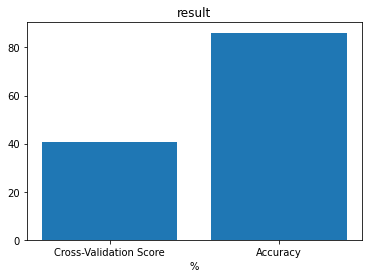

In [106]:
# DecisionTreeClassifier train50-re
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model, train50 ,predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

In [107]:
#nézzük meg trainrandom-ra is
trainrandom.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [108]:
# trainrandom-ra labelencoder
for x in trainrandom.columns:
    if trainrandom[x].dtype == 'object':
        # Encode labels with value between 0 and n_classes-1.
        lbl = preprocessing.LabelEncoder()
        
        # Fit label encoder
        lbl.fit(list(trainrandom[x].values))
        
        # Transform labels to normalized encoding.
        trainrandom[x] = lbl.transform(list(trainrandom[x].values))
trainrandom.dtypes

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncome_log    float64
LoanAmount_log         float64
dtype: object

In [109]:
trainrandom.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             21
Loan_Amount_Term       12
Credit_History         55
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
dtype: int64

In [110]:
# elimináljuk a hiányzó elemeket a trainrandom-ból
trainrandom['LoanAmount'].fillna(trainrandom['LoanAmount'].mean(), inplace=True)
trainrandom['Loan_Amount_Term'].fillna(trainrandom['Loan_Amount_Term'].mode()[0], inplace=True)
trainrandom['Credit_History'].fillna(trainrandom['Credit_History'].mode()[0], inplace=True)
trainrandom.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

Accuracy : 51.591%
Cross-Validation Score : 50.248%


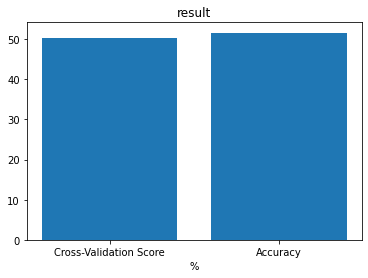

In [111]:
# logistic regression trainrandom-ra
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,trainrandom, predictor_var, outcome_var)
# gyenge

Accuracy : 44.389%
Cross-Validation Score : 44.389%


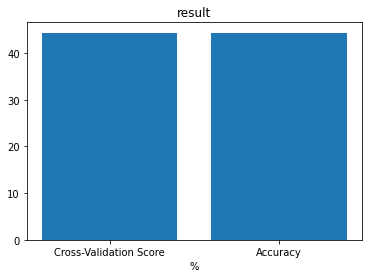

In [112]:
# logistic regression trainrandom-ra Education alapján
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education']
classification_model(model,trainrandom, predictor_var, outcome_var)
# gyenge

Accuracy : 51.256%
Cross-Validation Score : 50.416%


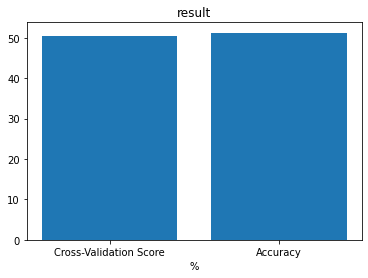

In [113]:
# logistic regression trainrandom-ra , több prediktorral
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model,trainrandom, predictor_var, outcome_var)
# még ez is elég gyenge

Accuracy : 86.600%
Cross-Validation Score : 40.035%


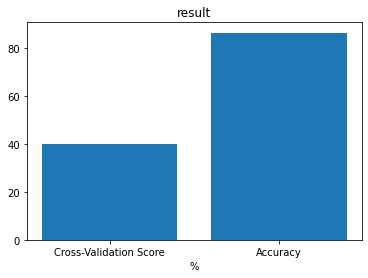

In [114]:
# DecisionTreeClassifier trainrandom-ra
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model, trainrandom ,predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

Accuracy : 99.349%
Cross-Validation Score : 75.568%


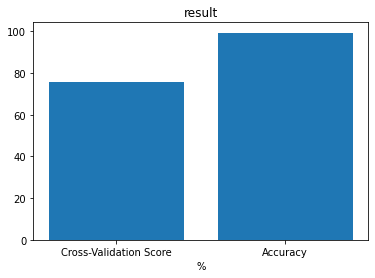

In [115]:
# random forest train-re
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log']
classification_model(model,train, predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

Accuracy : 97.525%
Cross-Validation Score : 42.651%


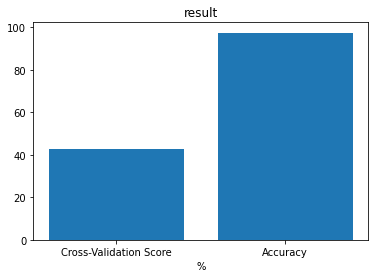

In [116]:
# random forest train70-re
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log']
classification_model(model,train70, predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

Accuracy : 98.776%
Cross-Validation Score : 43.265%


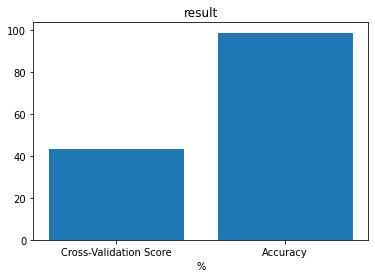

In [117]:
# random forest train50-re
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log']
classification_model(model,train50, predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

Accuracy : 98.660%
Cross-Validation Score : 48.256%


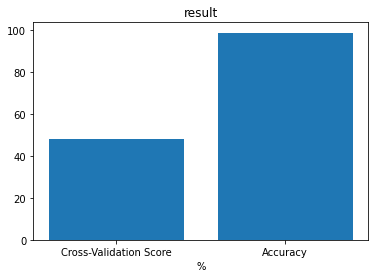

In [118]:
# random forest trainrandom-ra
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log']
classification_model(model,trainrandom, predictor_var, outcome_var)
# túltanulás tapasztalható , gyenge a cross validation érték

Accuracy : 81.759%
Cross-Validation Score : 81.435%


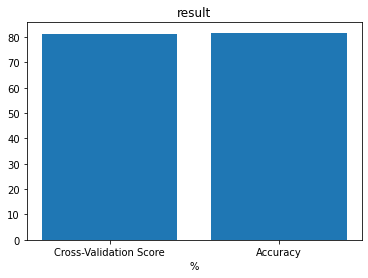

In [119]:
# próbáljunk meg igazítani ezen
#train-re random forest igazítva
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount_log','Credit_History','Dependents','Property_Area','Married','Education']
classification_model(model, train, predictor_var, outcome_var)
# na ez eddig a legjobb

Accuracy : 59.534%
Cross-Validation Score : 44.099%


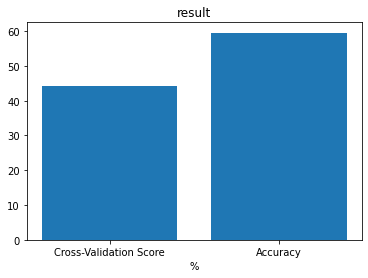

In [120]:
#train70-re random forest igazítva
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount_log','Credit_History','Dependents','Property_Area','Married','Education']
classification_model(model, train70, predictor_var, outcome_var)
# meh, ez még mindig nem elég

Accuracy : 60.000%
Cross-Validation Score : 47.143%


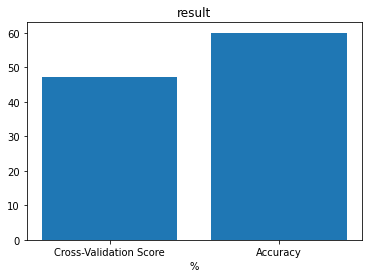

In [121]:
#train50-re random forest igazítva
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount_log','Credit_History','Dependents','Property_Area','Married','Education']
classification_model(model, train50, predictor_var, outcome_var)
# meh, ez még mindig nem elég

Accuracy : 62.814%
Cross-Validation Score : 47.751%


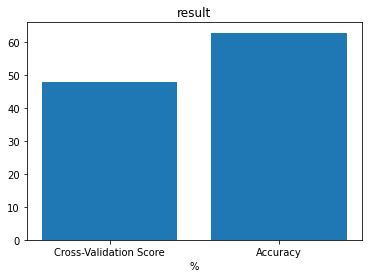

In [122]:
#trainrandom-ra random forest igazítva
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount_log','Credit_History','Dependents','Property_Area','Married','Education']
classification_model(model, trainrandom, predictor_var, outcome_var)
# meh, ez is gyenge

In [123]:
blind.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
TotalIncome          147
TotalIncome_log      147
dtype: int64

In [124]:
#blind TotalIncome feltöltése
blind['TotalIncome'] = blind['TotalIncome'].replace([np.NaN,np.inf,-np.inf,0],blind['TotalIncome'].mean())
blind['TotalIncome_log'] = blind['TotalIncome_log'].replace([np.NaN,np.inf,-np.inf,0],blind['TotalIncome_log'].mean())
blind.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
TotalIncome            0
TotalIncome_log        0
dtype: int64

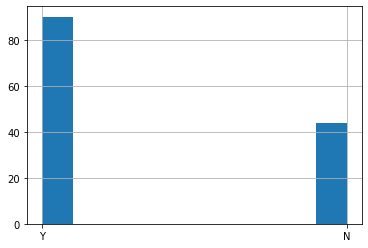

In [125]:
blind['Loan_Status'].hist()

In [126]:
blind.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome       object
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [127]:
#labelencoder blind-ra
for x in blind.columns:
    if blind[x].dtype == 'object':
        # Encode labels with value between 0 and n_classes-1.
        lbl = preprocessing.LabelEncoder()
        
        # Fit label encoder
        lbl.fit(list(blind[x].values))
        
        # Transform labels to normalized encoding.
        blind[x] = lbl.transform(list(blind[x].values))
blind.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [128]:
# blind & test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  
#Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #kijavítva
    
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for blind, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[blind,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[blind]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
    
  result = ('Cross-Validation Score','Accuracy')

  x = np.arange(len(result))
  y = [np.mean(error)*100,accuracy*100,]


  plt.bar(x,y)
  plt.xticks(x, result)
  plt.xlabel('%')
  plt.title('result')
  

  plt.show()

Accuracy : 73.253%
Cross-Validation Score : 73.246%


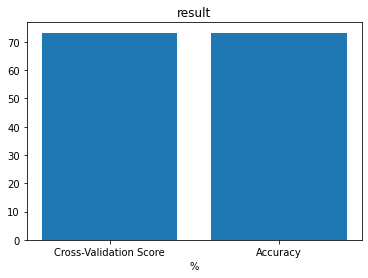

In [129]:
# logistic regression blind-ra
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,blind, predictor_var, outcome_var)

Accuracy : 73.253%
Cross-Validation Score : 73.246%


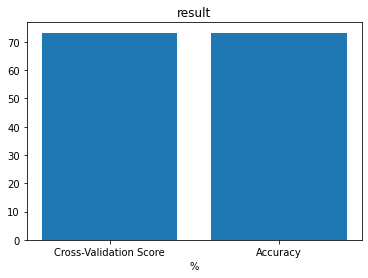

In [130]:
# logistic regression blind-ra Education alapján
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education']
classification_model(model,blind, predictor_var, outcome_var)

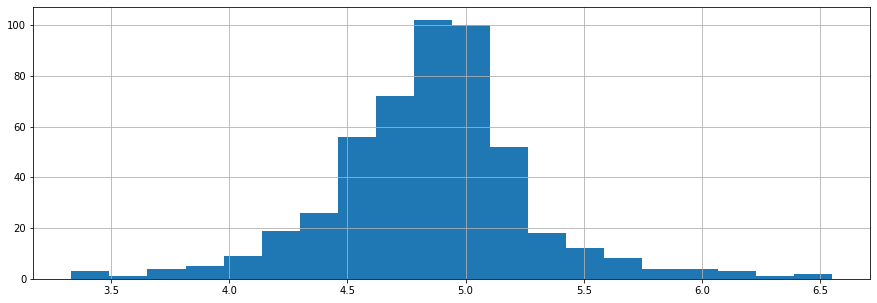

In [131]:
#LoanAmount_log blind-ra
blind["LoanAmount_log"] = np.log(blind["LoanAmount"])
blind["LoanAmount_log"] = blind["LoanAmount_log"].replace([np.inf,-np.inf,np.NaN],blind["LoanAmount_log"].mean())
blind["LoanAmount_log"].hist(bins=20,figsize=(15,5))

C:\Users\Buzadara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Buzadara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Accuracy : 73.253%
Cross-Validation Score : 73.246%


C:\Users\Buzadara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


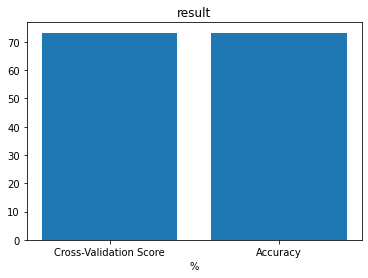

In [132]:
# logistic regression blind-ra , több prediktorral
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model,blind, predictor_var, outcome_var)

Accuracy : 91.018%
Cross-Validation Score : 56.085%


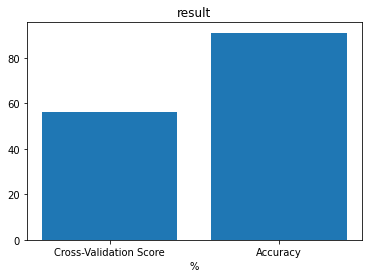

In [133]:
# DecisionTreeClassifier blind-ra
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']
classification_model(model, blind ,predictor_var, outcome_var)

Accuracy : 97.605%
Cross-Validation Score : 66.073%


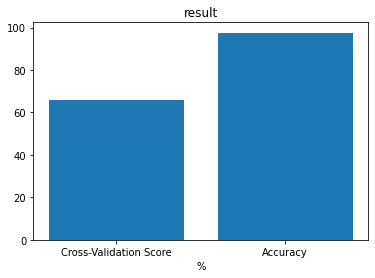

In [134]:
# blind-ra random forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log']
classification_model(model,blind, predictor_var, outcome_var)

Accuracy : 73.852%
Cross-Validation Score : 73.446%


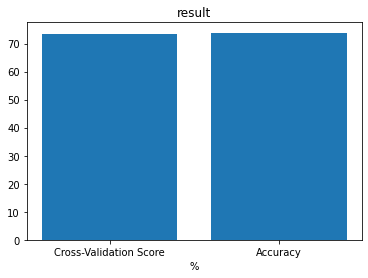

In [135]:
#blind-ra random forest igazítva
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount_log','Credit_History','Dependents','Property_Area','Married','Education']
classification_model(model, blind, predictor_var, outcome_var)

In [136]:
# konklúzió
# ha random mintavételezést csinálunk az adathalmazon, illetve ha változtatunk a tanítás és tesztelés arányán
# az eredetihez képest , akkor csak romlik a teljesítmény

# legjobb eredmény - eredeti train & test + logistic regression 5prediktor alapján